# An Analysis on a GreyMarket on the Dark Web
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972

## Motivation and Goals
This document contains an analysis of items that are listed on a black market website. The black market website that has been analyzed is called ‘Grey Market’ according to the website ‘Darknet Markets Links’. On ‘Grey Market’ you can find a wide variety of items, ranging from drugs to accounts on online services, from software applications to bank accounts, etc. You can access this black market through the Tor browser. The link to ‘Grey Market’ only works in this browser.

There are multiple goals for performing this analysis, the first being understanding how the black market works. The idea is that by going through items on a black market we can get an overview of what kind of items are listed and how much information about the item and/or seller is provided per item. The second goal is to form an opinion about the legality of the items we find. It is very likely that we will encounter items that are considered illegal in  the Netherlands. However not every item necessarily is illegal. Therefore for each item we analyse, we indicate whether we think it is legal and thus, should we be in contact with the police, whether the police should further investigate the item and/or seller.



## Methodology
To do the analysis we decided to go through 100 items on the ‘Grey Market’ website by doing 33% each. For each item we listed details about the item such as the price and the seller. The results we wrote down and then analyzed to draw a conclusion. More about the results can be found below.

The first result consists of exactly 100 analyzations of items on the website ‘Grey Market’. All of the items we analyzed belonged to the category ‘Digital’. Three subcategories were explored: ‘Information’, ‘Fraud’ and ‘Software’. We chose around 33 items in each subcategory.

Per item we listed the following properties:
* Name
* Type of item according to ‘Grey Market’
* Quantity in which you buy it
* Price per Quantity in United States Dollars
* Account-name of the Seller,
* Where it will be shipped from
* Where it can be shipped to
* Whether or not we think it is legal (Yes if we think it is legal, Yes? if we think it is legal but are not sure (depends), and No if we think it is illegal)
* The subcategory the item belongs to
* How many pieces of the item are still in stock according to the seller.

All of this information can be found on the explore page or the page of the item on the website of the 'Gray Market'.

After manually harvesting this data from our chosen 'Gray Market', we will start our analysis on this data. This will be done by making plots in Jupyter Notebook using pandas and matplotlib. We will plot this data to answer the following questions:


## Data
Below the data that we have gathered can be found in the df variable.

In [1]:
from read_csv import df, seller_df
df

,Name,Item,Quantity,$/Quantity,Seller,Shipping from,Shipping to,Legal,Category,In Stock
0,Amazon Carding Tutorial,eBook,1,5,topnotchdrugz,Worldwide,Worldwide,Yes?,Information/eBook,498.0
1,12 Ways To Rob A ATM Machine,eBook,1,3,topnotchdrugz,Worldwide,Worldwide,Yes?,Information/eBook,99.0
2,How to use socks 5,files,1,1,Hackyboy,Worldwide,Worldwide,Yes?,Information/Guides,999.0
3,Hdvpass.com Porn Premium Account Plus Warranty,accounts,1,3,enjoymyaccounts,Worldwide,Worldwide,No,Information/other,998.0
4,NORD VPN 6 Months Subscription + WARRANTY,accounts,1,3.2,pornseller,Worldwide,Worldwide,No,Information/other,999.0
...,...,...,...,...,...,...,...,...,...,...
95,22K BANK BALANCE! AUSTRALIAN BANK ACCOUNT!,accounts,1,199.00,brikzone123,Worldwide,Worldwide,No,Fraud,1.0
96,SSN Template PSD PERFECT EDIT!,files,1,32.97,Tactic,Worldwide,Worldwide,No,Fraud,15.0
97,APPLE ACCOUNTS AND CREDIT CARD FULL DATA. (OFFER),accounts,1,8.79,C4RD1NGC0D3,Worldwide,Worldwide,No,Fraud,10000.0
98,-AUSTRALIAN- BANK DROPS PRE-SET- READY TO USE,accounts,1,35.67,brikzone123,Worldwide,Worldwide,No,Fraud,30.0


In [2]:
seller_df

,Seller,Open Orders,Completed Orders,Disputes Won,Disputes Lost,Rating
0,g3cko,15,146,2,0,9.5
1,Tactic,3,85,1,0,10.0
2,fraudsterelite,0,12,1,0,10.0
3,topnotchdrugz,10,96,0,1,9.6
4,leaguemode,0,0,0,0,0.0
5,Hackyboy,17,71,4,2,9.5
6,dumbakarahi,2,31,2,0,9.5
7,TheShop,2,18,0,0,9.8
8,Raperholic,5,33,0,0,9.7
9,victorviran,4,52,0,0,9.6


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Sellers
We analysed the sellers of the selected products. Here we found that *g3cko* is the largest seller by 21 products. This is followed by *enjoymyaccounts* and *topnotchdrugz* with 13 and 8 products respectively. However, when looking at the amount of completed orders *g3ecko* is only the second largest seller, surpassed by *DrWhit3*. None of the sellers seem to be particularly malicious, having a high rating and low amount of *Disputes Lost*. *DrWhit3* has a relatively worse performance, with 2% of orders having a lost dispute. The only truely untrustworthy seller seems to be *leaguemode*, with no *Completed Orders* or a rating.

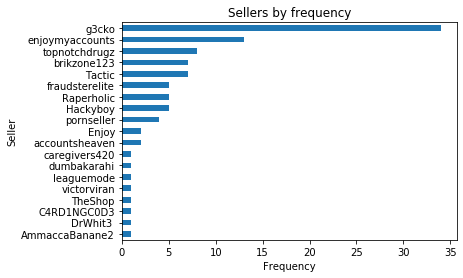

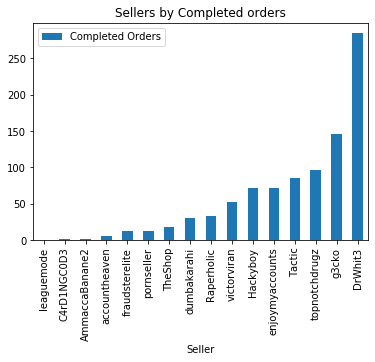

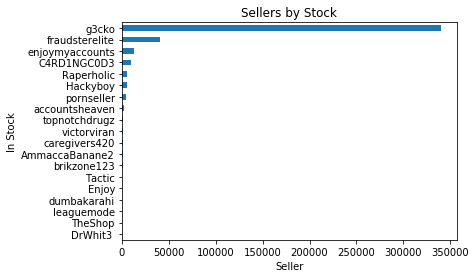

In [4]:
sellers_by_frequency = df["Seller"].value_counts()
sellers_by_frequency.sort_values().plot(kind='barh')
plt.title('Sellers by frequency')
plt.ylabel('Seller')
plt.xlabel('Frequency')
plt.show()

sellers = seller_df.sort_values(by='Completed Orders').plot(x='Seller', y='Completed Orders', kind='bar')
plt.title('Sellers by Completed orders')
plt.xlabel('Seller')
plt.show()
group = df.groupby(['Seller'])
group = group["In Stock"].sum().sort_values()
group.plot.barh()
plt.title('Sellers by Stock')
plt.ylabel('In Stock')
plt.xlabel('Seller')
plt.show()


## Investigate

While most sellers provide fraudulent services or product, most are not strictly illegal. Most product are either sold accounts for different websites, or ebooks and guides for illegal activities. While selling accounts might not be allowed by the Terms of Service, it is not exactly criminal.

One seller that might be looked into by the police is *topnotchdrugz*. As the name suggests, this sellers also sells drugs, next to the products we selected. 

Of the selected products, only one seems to be interesting for the police to investigate. That products is *order fake passports* from *caregivers420*. Though upon further investigation this sellers seems now to be offline.

Unfortunately, the rest of the selected products or sellers do not seem to be of particular interest for the police to investigate. This is probably due to the chosen category, which primairily provides fraudulant digital services/products. 

## Legality
The amount of legal advertisements were also included in our search on the grey market.


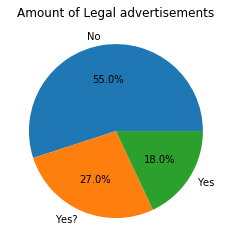

In [5]:
legal_amount = df["Legal"].value_counts()
legal_amount.plot.pie(autopct='%1.1f%%')
plt.title('Amount of Legal advertisements')
plt.ylabel('')
plt.show()

As seen in the above pie chart, the majority of the 100 advertisements that were found on the chosen 'Gray Market' were categorized as not legal. This is an expected outcome, since these 'Gray Markets' are known by the general public for their illegal nature. However, for further analysis we will be diving deeper into the data and look at the categories in which the items were classified, as seen in the below plot.

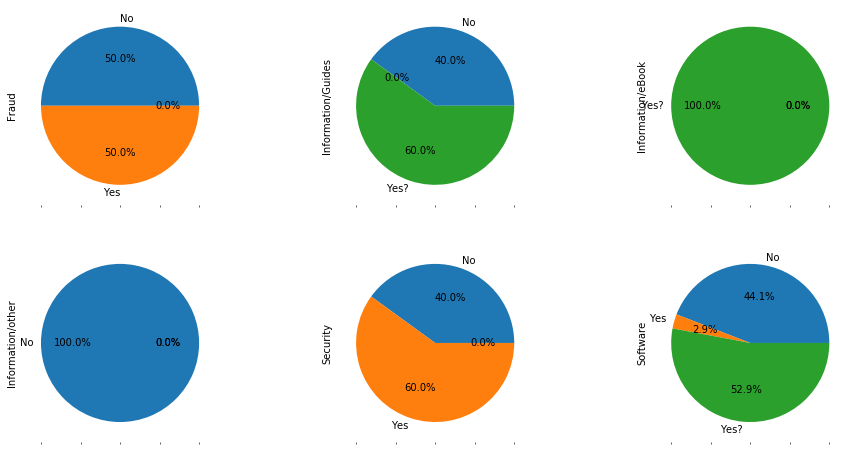

In [6]:
df.groupby(['Category', 'Legal']).size().unstack().transpose().plot(autopct='%.1f%%', kind='pie', subplots=True, figsize=(16,8), layout=(2,3), legend=False)
plt.show()

In the chart above, the percentage of legal items per category is shown. We can analyze this data and give some explanations for some of the results. 
* Fraud: The name 'Fraud' implies an illegal nature of this first category. However, as seen in the plot above, the distribution of legal and illegal items is 50/50. This can be explained by noting that many of the items in this category are tutorials on how to perform fraud. Offering a tutorial is by definition not illegal and therefore this category has relatively many legal items. 
* Information/Guides: The Information/Guides category proved to be a difficult category to classify as illegal or legal. Mainly because most of the items here are guides that may or may not be illegally resold. 
* Information/eBook: This category sounds relatively innocent, but as seen in the plot, the data shows that all of the items in this category are classified as 'Yes?', meaning that the legality of the items differs for every interpretation. Most of the items in here are eBooks that may or may not be illegally resold.
* Information/other: The 'other' subcategory of Information is the only category that is filled by 100% illegal items. Most of these items are accounts for, mainly, media websites, which are not legal to share outside of the personal environment.
* Security: The security category is mostly made up of legal items, these legal items are mostly tutorials, which are by definition not illegal to sell. The items that are considered illegal are cracked computer applications. 
* Software: Software is the largest category of our data set and mostly consists of items that are difficult to determine the legalily of. These items are software licenses for applications. These licenses are difficult to classify, because there exist websites on the 'normal' internet with a business practice of selling these licenses or software keys. These websites have proven to be very difficult to sue, and therefore 52.9% of the items in this category have a 'Yes?' classification. 

As seen in this plot, the tendency towards the general illegality is caused by the Information/Other category. None of the other categories has a majority of illegal items on their category pages. We do not have data on the percentage of items in the Information/Other category on the website as a whole, but this data might give an interesting insight in the legality of the website as a whole.  

## Sellers legality

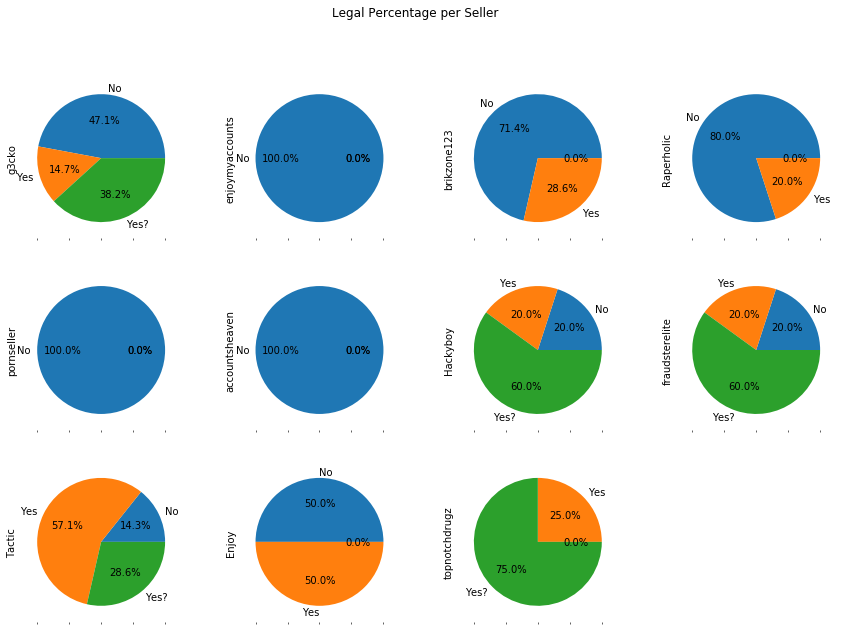

In [7]:
group = df.groupby(['Seller', 'Legal']).size().unstack()
group = group.fillna(0)
group = group[group.transpose().sum() > 1]
group = group.sort_values(by = ['No', 'Yes?', 'Yes'], ascending=False)
group.transpose().plot.pie(autopct='%.1f%%', subplots=True, figsize=(15,10), layout=(3,4), legend=False)
plt.suptitle('Legal Percentage per Seller')
plt.show()

In the image above, the percentage of legal items per seller are shown. For this plot, only the sellers with more than one item in the dataset were used. 

As seen in this chart, there are three sellers (pornseller, accountsheaven and enjoymyaccounts) who have a 100% of their items classified as illegal. These sellers mostly act in the Information/Other category, which explains this percentage of illegal posts. As an addition to the 'Investigate' paragraph, these sellers might also be interesting for the authorities to keep an eye on. 

Another interesting find is that there is only one seller who mainly sells legal items. This seller is Tactic, who mostly has tutorials in the Fraud section, which are not illegal by definition.


# Conclusion
This paper has analyzed items and sellers and provided an insight in the 'Grey Market' website on the Dark Web. The categories chosen in this paper do not indicate an immediate need for the authorities to investigate thoroughly. The items that are considered illegal are, excluding some exceptions, not dangerous for society. Most of the illegal items would fall in the 'small crime' category, which does not grant them priority over other, more dangerous Black Markets. The only sellers that are interesting for the Authorities are the ones that also sells hard drugs, which do not fall in the category that was researched in this paper. 
As a final conclusion, the Information category is not worth the effort for cyber police.
